# 03. Функции высших порядков

<div style="text-align: right"> 
    
    Лекция 2 11/02/21 
    
    Кубенский Александр Александрович
    
    akoubensky@gmail.com
</div> 

## 03.1 Функция `Map`

Функции - обычные объекты, с которыми можно работать.

In [1]:
sqr :: Integer -> Integer
sqr x = x * x

In [2]:
source = [1, 2, 5, 7, 11]

- хотелось бы сделать применение к каждому элементу, возведя его в квадрат. Такая функция называется **отображением** - `map`. Функция `map` будет применять функцию `sqr` ко всем элементами списка `source`.

In [3]:
map sqr source

[1,4,25,49,121]

In [8]:
-- первый аргумент - функция из целого в целое
-- maps :: (a -> b) -> [a] -> [b] можно так определить функцию
maps :: (Integer -> Integer) -> [Integer] -> [Integer]
maps _ [] = []
maps f (x:ls) = (f x) : (maps f ls)
-- результирующий список - список типа b

Line 4: Redundant bracket
Found:
(f x) : (maps f ls)
Why not:
f x : (maps f ls)Line 4: Redundant bracket
Found:
(f x) : (maps f ls)
Why not:
(f x) : maps f ls

In [10]:
maps sqr source

[1,4,25,49,121]

## 03.2 $\lambda$-исчисление

### 03.2.1 Использование $\lambda$-функций

`lambda` - исчисление Черча - исчисление безымянных функций.

sqr : $\lambda$x.* x x

- $\lambda$x - голова x
- после точки - тело - `* x x`

В `haskell` можно похожим образом определять безымянную функцию:

```haskell
sqr = \x -> (x * x)
```

- `\x` - "лямбда" x
- под знаком $\lambda$ могут быть образцы
- можем написать несколько уравнений с $\lambda$ образцами

Для чего нужны $\lambda$-функции? В качестве первого аргумента функции `map` я могу задать $\lambda$ выражени (функция без имени)

### 03.2.2. Более сложная функция, заданная с помощью $\lambda$ выражения

In [12]:
factorial :: Integer -> Integer
factorial = \n -> case n of
                    0 -> 1
                    n -> n * factorial (n-1)

Line 2: Redundant lambda
Found:
factorial
  = \ n
      -> case n of
           0 -> 1
           n -> n * factorial (n - 1)
Why not:
factorial n
  = case n of
      0 -> 1
      n -> n * factorial (n - 1)Line 2: Use lambda-case
Found:
\ n
  -> case n of
       0 -> 1
       n -> n * factorial (n - 1)
Why not:
\case
  0 -> 1
  n -> n * factorial (n - 1)

- `case` - вычисляет разные выражения, в зависимости от того, с каким образцом сопоставлено определенное полученное выражение

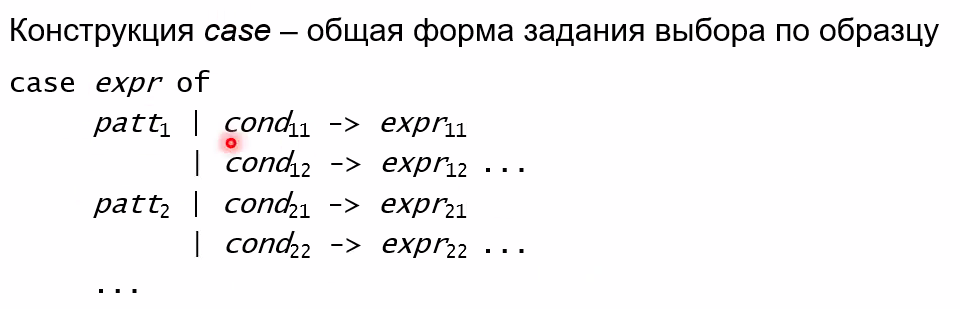

Заметим: что если не сработало ни с одним сторожем в `patterne`, то будет выдаваться ошибка

### 03.3.3 Функция свёртки

Пусть мы хотим последовательно применять функцию сложения ко всем парам элементов (`func (+)`) списка `source = [1,2,5,7,11]`

Возьму зерно `seed=0` и, начиная с этого числа, будем выращивать список.

- беру последний элемент списка и прибавляю к нему

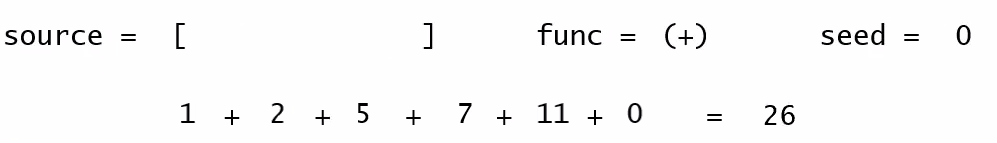

- возьму конструктор `func = (:)` и `seed = []`:

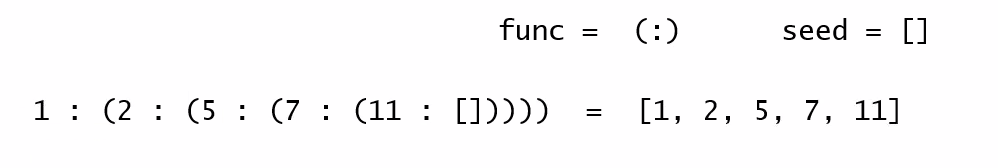

**Определение**: назовём функцию **свёртки** - `foldr` (`foldl` - с начала списка). Получает бинарную функцию с двумя аргументами:

```haskell
foldr :: (a->b->b) -> b -> [a] -> b
foldr func seed [] = seed
foldr func seed (x:ls) = func x (foldr func seed ls)
```

*бинарная функция* - **функция с двумя аргументами**.

In [13]:
foldr (+) 0 [1, 2, 3, 4]

Line 1: Use sum
Found:
foldr (+) 0
Why not:
sum

10

In [14]:
factorial :: Integer -> Integer
factorial n = foldr (*) 1 [1..n]

Line 2: Use product
Found:
foldr (*) 1
Why not:
product

### 03.3.4 Программирование с помощью функций высшего порядка

1. **Функция `search`**

In [43]:
search :: (Eq a) => a -> [a] -> Bool
search e list = foldr (||) False (map (\ x -> x == e) list)
search 5 [1, 2, 5, 7, 11]

Line 2: Use or
Found:
foldr (||) False
Why not:
orLine 2: Fuse foldr/map
Found:
foldr (||) False (map (\ x -> x == e) list)
Why not:
foldr ((||) . (\ x -> x == e)) False listLine 2: Avoid lambda using `infix`
Found:
(\ x -> x == e)
Why not:
(== e)

: 

- `доллар` - применение к аргументу

> Haskell - ленивый язык - если результат получен, то сравнения не будет

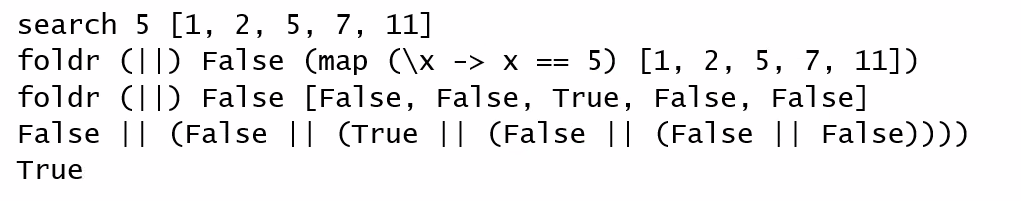

2. **Функция `any`**

- стандартное функцональное программирование - не будет вычислять аргумент, если второй результат уже `True`

In [19]:
anyOldStyle :: (a -> Bool) -> [a] -> Bool
anyOldStyle _ [] = False
anyOldStyle f (x:ls) = f x || (anyOldStyle f ls)

Line 3: Redundant bracket
Found:
f x || (anyOldStyle f ls)
Why not:
f x || anyOldStyle f ls

- `foldr`

In [21]:
any :: (a -> Bool) -> [a] -> Bool
any f list = foldr (\x b -> f x || b) False list

Line 2: Eta reduce
Found:
any f list = foldr (\ x b -> f x || b) False list
Why not:
any f = foldr (\ x b -> f x || b) False

In [22]:
all :: (a -> Bool) -> [a] -> Bool
all f list = foldr (\x b -> f x && b) True list

Line 2: Eta reduce
Found:
all f list = foldr (\ x b -> f x && b) True list
Why not:
all f = foldr (\ x b -> f x && b) True

In [24]:
search e list = any (\x -> x ==e ) list

Line 1: Eta reduce
Found:
search e list = any (\ x -> x == e) list
Why not:
search e = any (\ x -> x == e)Line 1: Avoid lambda using `infix`
Found:
(\ x -> x == e)
Why not:
(== e)

- операция `++`

In [25]:
join1 :: [a] -> [a] -> [a]
join1 [] list = list
join1 (x:ls) list = x : (join1 ls list)

Line 2: Use foldr
Found:
join1 [] list = list
join1 (x : ls) list = x : (join1 ls list)
Why not:
join1 ls list = foldr (:) list lsLine 3: Redundant bracket
Found:
x : (join1 ls list)
Why not:
x : join1 ls list

In [26]:
join2 :: [a] -> [a] -> [a]
join2 lis1 lis2 = foldr (:) lis2 lis1

- `foldl` - левая вставка - ещё один способ свёртки списка
    - будем обрабатывать вызов сначала, а не с конца - кольцевая рекурсия

In [42]:
foldl :: (b -> a -> b) -> b -> [a] -> b
foldl _ seed [] = seed
foldl f seed (x:ls) = foldl f (f seed x) ls

- `reverse`
    - `app` - перестановка элементов местами

In [44]:
reverse :: [a] -> [a]
reverse list = foldl app [] list where app l x = x:l

Line 2: Eta reduce
Found:
reverse list = foldl app [] list
Why not:
reverse = foldl app []

- `flip` - берет функцию аргументов, но превращает ее в функцию, которая с теми же аргументами делает функцию, только в другом порядке

In [46]:
flip :: (a->b->c) -> (b -> a -> c) -- возвращает в качестве результата функцию!!
flip f = f' where f' x y = f y x

In [47]:
reverse :: [a] -> [a]
reverse list = foldl (flip (:)) [] list

Line 2: Eta reduce
Found:
reverse list = foldl (flip (:)) [] list
Why not:
reverse = foldl (flip (:)) []

- `comp` `(.)` - стилизация кружка композиции - композиция двух функций

In [48]:
comp :: (b -> c) -> (a -> b) -> (a -> c)
comp f g = fg where fg x = f (g x)

In [49]:
(.) :: (b -> c) -> (a -> b) -> (a -> c)
f . g = fg where fg x = f (g x)

In [50]:
sqr :: (Num a) => a -> a
sqr a = a * a
power4 :: (Num a) => a -> a
power4 = sqr .sqr

### 03.3.5 Практика

#### 03.3.5.1 **Выбрать элементы из списка, делящиеся на 3**

In [51]:
filterList :: (a -> Bool) -> [a] -> [a]
filterList _ [] = []
filterList f (x:ls) | f x = x : filterList f ls
                    | otherwise = filterList f ls

In [54]:
filterList :: (a -> Bool) -> [a] -> [a]
filterList _ [] = []
filterList f (x:ls) | f x = x : fls
                    | otherwise = fls 
                    where fls = filterList f ls

In [58]:
filterList (\ x -> x `mod` 3 == 0) [1..9]

[3,6,9]

Взять первые 10 таких элементов.

In [61]:
take 10 $ filterList (\ x -> x `mod` 3 == 0) [1..100000]

[3,6,9,12,15,18,21,24,27,30]

> Есть встроенная функция `filter`!

#### 03.3.5.2 **Список индексов элементов делящиеся на 3**

In [65]:
fi :: (a -> Bool) -> [a] -> [Int]
fi f list = map fst $ filter (\(i, x) -> f x) $ zip [0..length list-1] list

: 